In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
from salishsea_tools import viz_tools
import cmocean as cm
import datetime as dt

### Import data

In [2]:
abort = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/01apr23_2/output.abort.nc')
GridU = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/01apr23_2/sss150_1h_20230401_20230401_grid_U.nc')
GridV = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/01apr23_2/sss150_1h_20230401_20230401_grid_V.nc')
GridT = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/01apr23_2/sss150_1h_20230401_20230401_grid_T.nc')
restartFile = xr.open_dataset('/data/cstang/MEOPAR/SalishSea/results/sss150/31mar23/2023033100_000.nc')

xIdxAb = 226 - 1     #fortran indexing starts at 1
yIdxAb = 374 - 1     #fortran indexing starts at 1

abort

<xarray.Dataset>
Dimensions:       (y: 826, x: 710, deptht: 39, time_counter: 1)
Coordinates:
    nav_lon       (y, x) float32 ...
    nav_lat       (y, x) float32 ...
  * deptht        (deptht) float32 0.5 1.5 2.5 3.5 ... 333.8 360.7 387.6 414.5
  * time_counter  (time_counter) datetime64[ns] 2023-04-01T00:00:19
Dimensions without coordinates: y, x
Data variables: (12/14)
    vosaline      (time_counter, deptht, y, x) float32 ...
    votemper      (time_counter, deptht, y, x) float32 ...
    sossheig      (time_counter, y, x) float32 ...
    vozocrtx      (time_counter, deptht, y, x) float32 ...
    vomecrty      (time_counter, deptht, y, x) float32 ...
    vovecrtz      (time_counter, deptht, y, x) float32 ...
    ...            ...
    soshfldo      (time_counter, y, x) float32 ...
    soicecov      (time_counter, y, x) float32 ...
    sozotaux      (time_counter, y, x) float32 ...
    sometauy      (time_counter, y, x) float32 ...
    vovvldep      (time_counter, deptht, y, x) float32 ...
    vovvle3t      (time_counter, deptht, y, x) float32 ...
Attributes:
    Conventions:  CF-1.1
    production:   An IPSL model
    TimeStamp:    19/12/2024 18:18:36 -0800
    file_name:    output.abort.nc

In [3]:
# Import mesh data
mesh = xr.open_dataset('/ocean/mdunphy/SSS150/grid/mesh_mask_southsalishsea150_update202108210102AUM1.nc')
tmask = 1 - mesh.tmask[0]
umask = 1 - mesh.umask[0]

Text(0.5, 1.0, 'u-velocity')

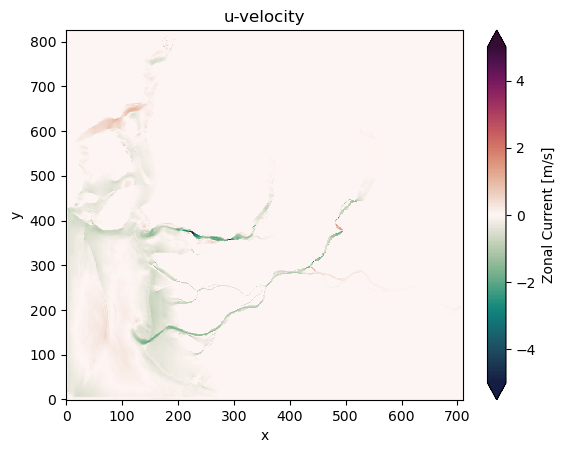

In [4]:
abort['vozocrtx'][0,0].plot(cmap=cm.cm.curl,vmin=-5,vmax=5)
# plt.ylim(300,400)
# plt.xlim(110,280)
plt.title('u-velocity')

Text(0.5, 1.0, 'u-velocity - abort')

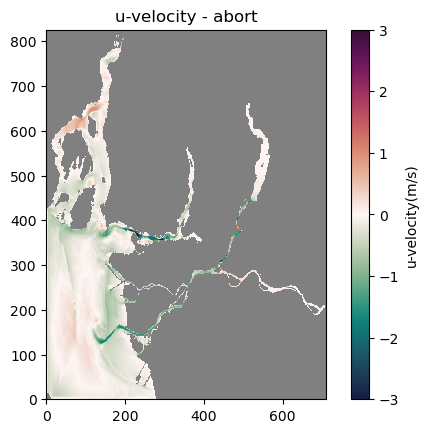

In [33]:
masked_uvel = np.ma.masked_array(abort.vozocrtx[0, 0], mask=umask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
# ax.set_xlim(100,450)
# ax.set_ylim(300,500)
plt.title('u-velocity - abort')

Text(0.5, 1.0, 'u-velocity - abort')

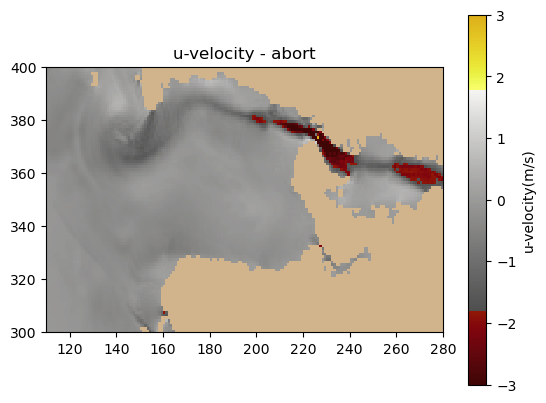

In [32]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-3,vmax=3,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(300,400)
plt.xlim(110,280)
plt.title('u-velocity - abort')

(180.0, 260.0)

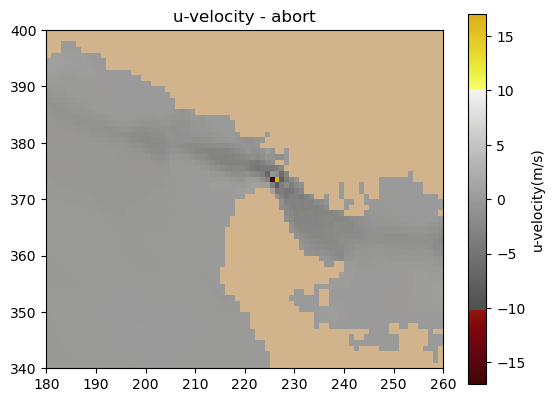

In [31]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-17,vmax=17,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.title('u-velocity - abort')
plt.ylim(340,400)
plt.xlim(180,260)

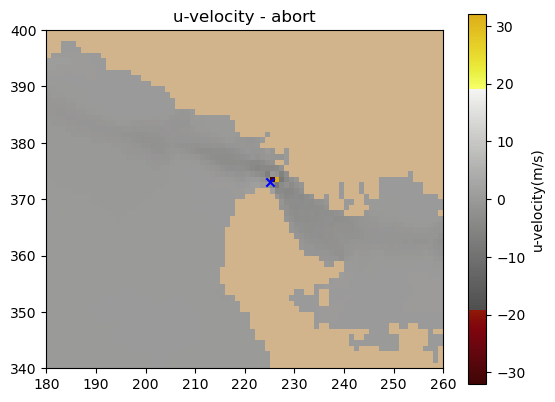

In [30]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(340,400)
plt.xlim(180,260)
plt.title('u-velocity - abort')

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

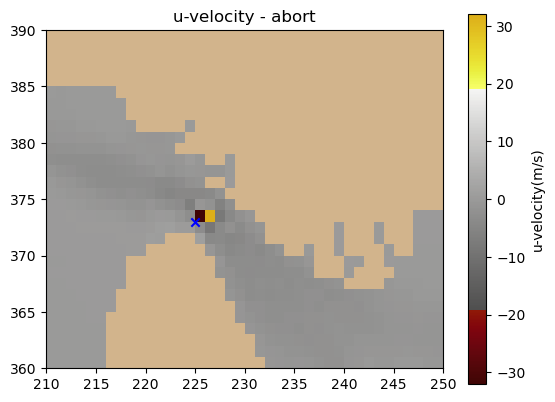

In [29]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_uvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(360,390)
plt.xlim(210,250)
plt.title('u-velocity - abort')

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

(180.0, 260.0)

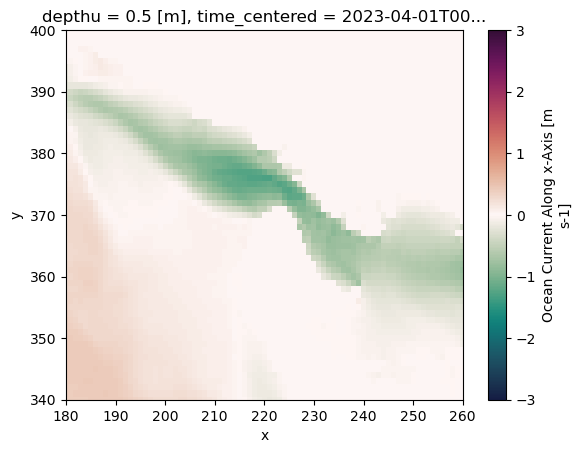

In [34]:
GridU['vozocrtx'][0,0].plot(cmap=cm.cm.curl,vmin=-3,vmax=3)
plt.ylim(340,400)
plt.xlim(180,260)

Text(0.5, 1.0, 'uvel 03:30')

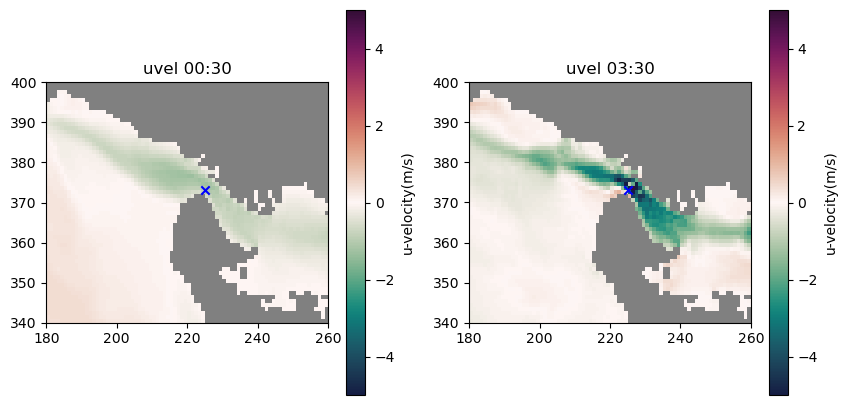

In [37]:
maskedUvel = np.ma.masked_array(GridU.vozocrtx[0, 0], mask=umask[0])

fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedUvel,vmin=-5,vmax=5,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title('uvel 00:30')

pm = ax2.pcolormesh(masked_uvel,vmin=-5,vmax=5,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title('uvel 03:30')

### Look at v-velocity

Text(0.5, 1.0, 'v-velocity')

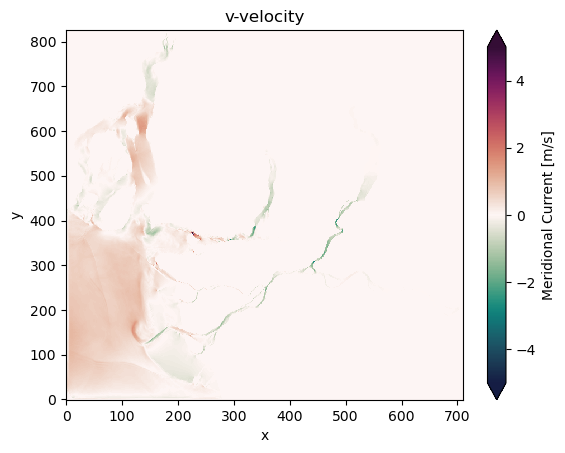

In [13]:
abort['vomecrty'][0,0].plot(cmap=cm.cm.curl,vmin=-5,vmax=5)
plt.title('v-velocity')

In [14]:
masked_vvel = np.ma.masked_array(abort.vomecrty[0, 0], mask=umask[0])

Text(0.5, 1.0, 'v-velocity - abort')

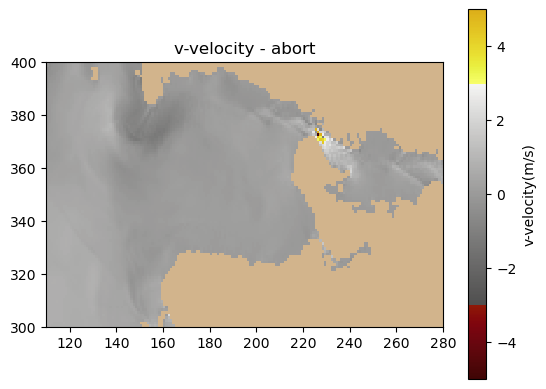

In [22]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_vvel,vmin=-5,vmax=5,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
plt.ylim(300,400)
plt.xlim(110,280)
plt.title('v-velocity - abort')

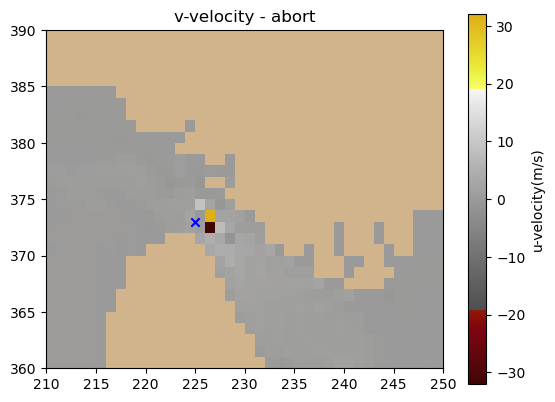

In [21]:
fig, ax = plt.subplots(1, 1)

cmap = cm.cm.oxy
cmap.set_bad('tan')

pm = ax.pcolormesh(masked_vvel,vmin=-32,vmax=32,cmap=cm.cm.oxy)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('u-velocity(m/s)')
plt.ylim(360,390)
plt.xlim(210,250)
plt.title('v-velocity - abort')

plt.scatter(xIdxAb,yIdxAb,marker='x',color='blue')

Text(0.5, 1.0, 'vvel - abort')

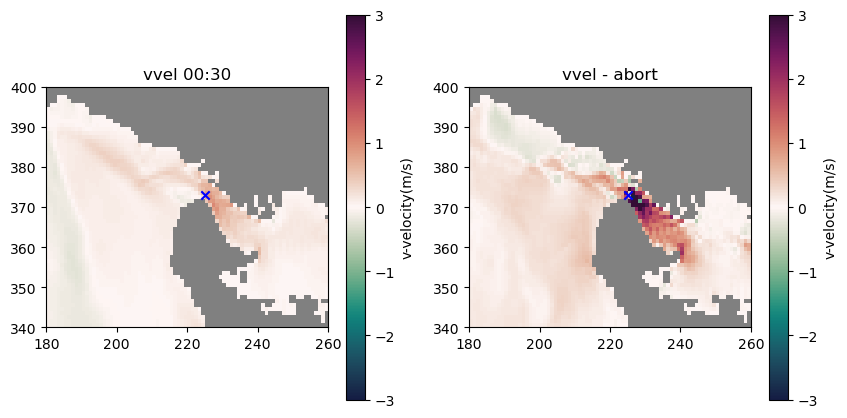

In [39]:
fig,[ax1,ax2] = plt.subplots(1,2,figsize=(10,5))

maskedVvel = np.ma.masked_array(GridV.vomecrty[0, 0], mask=umask[0])
masked_vvel = np.ma.masked_array(abort.vomecrty[0, 0], mask=umask[0])

cmap = cm.cm.curl
cmap.set_bad('grey')

pm = ax1.pcolormesh(maskedVvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax1);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax1.set_ylim(340,400)
ax1.set_xlim(180,260)
ax1.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax1.set_title('vvel 00:30')

pm = ax2.pcolormesh(masked_vvel,vmin=-3,vmax=3,cmap=cmap)
viz_tools.set_aspect(ax2);
cb = fig.colorbar(pm)
cb.set_label('v-velocity(m/s)')
ax2.set_ylim(340,400)
ax2.set_xlim(180,260)
ax2.scatter(xIdxAb,yIdxAb,marker='x',color='blue')
ax2.set_title('vvel - abort')


### Look at salinity

Text(0.5, 0.98, 'surface salinity - abort')

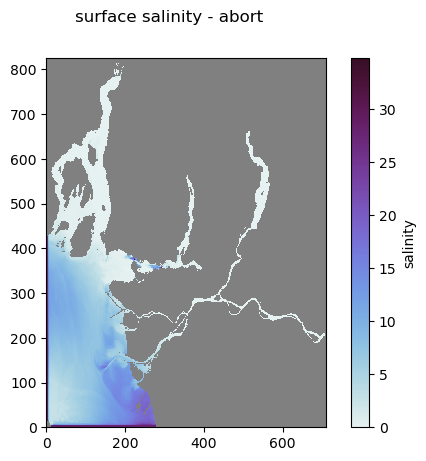

In [20]:
masked_sal = np.ma.masked_array(abort.vosaline[0, 0], mask=umask[0])

cmap = cm.cm.dense
cmap.set_bad('grey')

fig, ax = plt.subplots(1, 1)

pm = ax.pcolormesh(masked_sal,cmap=cmap)
viz_tools.set_aspect(ax);
cb = fig.colorbar(pm)
cb.set_label('salinity')
fig.suptitle('surface salinity - abort')

Text(0.5, 0.98, 'Salinity')

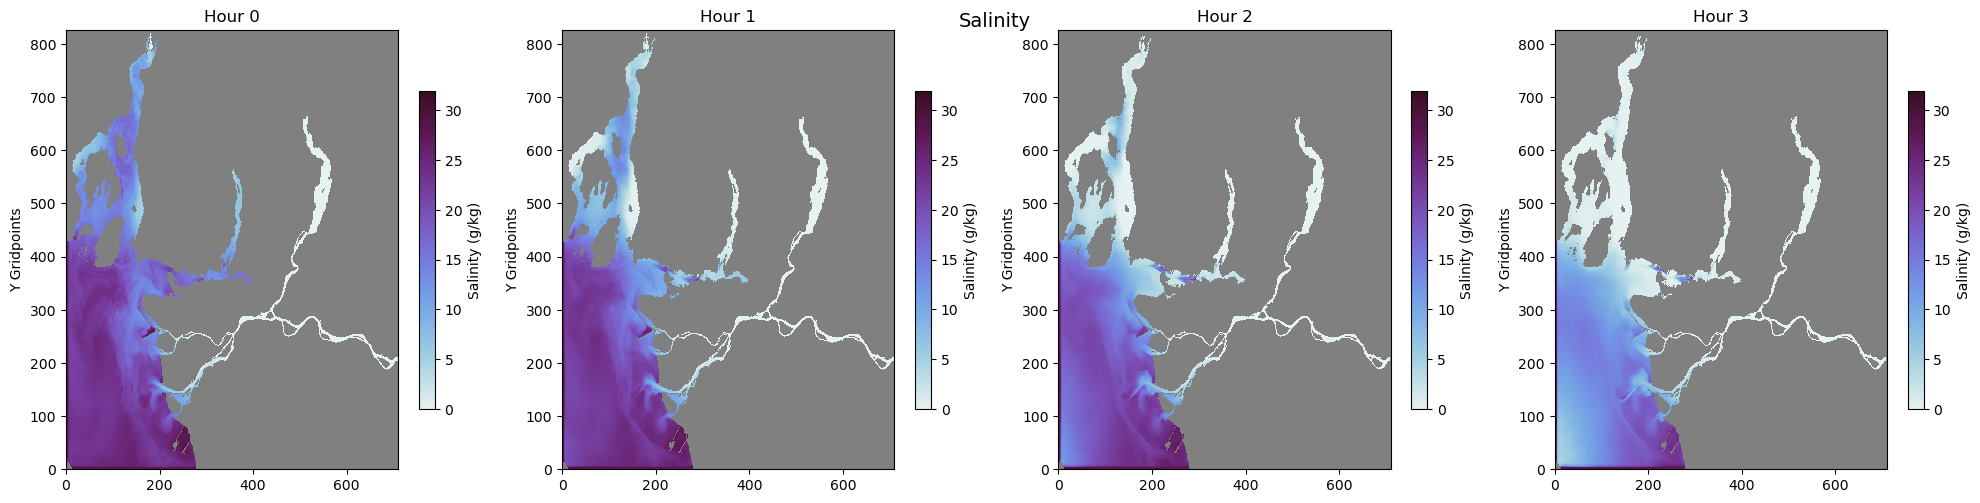

In [40]:
#Plot daily tide cycle surface - Feb23

nrows = 1
ncols = 4

fig, ax = plt.subplots(nrows,ncols,figsize=(20, 5))
cmap = cm.cm.dense
cmap.set_bad('gray')

date = pd.DatetimeIndex(GridU.time_counter.values)

for i in range(nrows):
    for j in range(ncols):
    
        vfull = np.ma.masked_array(GridT.vosaline[i*ncols+j, 0], mask=tmask[0])
        ax[j].pcolormesh(vfull,vmin=0,vmax=32)
        colours = ax[j].pcolormesh(vfull, cmap=cmap,vmin=0,vmax=32)
        cb = fig.colorbar(colours, ax=ax[j],shrink=0.7)
        cb.set_label('Salinity (g/kg)')
        viz_tools.set_aspect(ax[j]);
        ax[j].set_ylabel('Y Gridpoints')
        ax[j].set_title(f'Hour {date[i*ncols+j].hour}')

fig.tight_layout()
fig.suptitle('Salinity',fontsize=14)
